<a href="https://colab.research.google.com/github/MOKUAGU/Codes/blob/main/Copy_of_CS167Notebook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #6
Name: munachi okuagu


## Problem Description:
Describe the problem you are going to attempt to solve
Describe the tools used and your approach. 

the problem: to determine whether or not a patient has pneumonia 

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# attempt to get GPU reserved
# In Google Colab, select Runtime -> Change runtime type
# If possible, select GPU and SAVE
# If not possible, OK. Computations may take a bit longer
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import keras
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import the libraries
import keras
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import sys

<hr>

# Example code for Chest X-Ray

In [ ]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/CS167DATASETS/chest_xray/train' #5216 images
test_data_dir = '/content/drive/MyDrive/CS167DATASETS/chest_xray/test'   #624 images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32


the problem: 


In [ ]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 5217 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
#set up CNN - original 
#layer conv, pool, convo flatten , fully connected 

#setting up a CNN model here....
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size =(3,3)))

model.add(Conv2D(64,(3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32, activation= 'relu')) #fully-connected layer
model.add(Dense(1,activation='sigmoid')) ### need to change this 

# need to compile the model before you can use it
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )


Epoch 1/5
164/164 [==============================] - 1058s 6s/step - loss: 0.3272 - accuracy: 0.8532 - val_loss: 0.5416 - val_accuracy: 0.7933
Epoch 2/5
164/164 [==============================] - 15s 89ms/step - loss: 0.2195 - accuracy: 0.9187 - val_loss: 0.4910 - val_accuracy: 0.8221
Epoch 3/5
164/164 [==============================] - 15s 89ms/step - loss: 0.1004 - accuracy: 0.9615 - val_loss: 0.9104 - val_accuracy: 0.7516
Epoch 4/5
164/164 [==============================] - 14s 88ms/step - loss: 0.0841 - accuracy: 0.9684 - val_loss: 1.1175 - val_accuracy: 0.7356
Epoch 5/5
164/164 [==============================] - 14s 87ms/step - loss: 0.0740 - accuracy: 0.9735 - val_loss: 1.0923 - val_accuracy: 0.7468


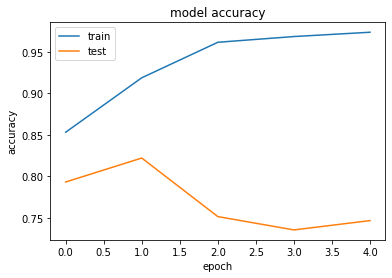

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# tuned epoch 
#setting up a CNN model here....
model = Sequential()
model.add(Conv2D(20, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size =(3,3)))

model.add(Conv2D(34,(3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32, activation= 'relu')) #fully-connected layer
model.add(Dense(1,activation='sigmoid')) ### need to change this 

# need to compile the model before you can use it
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy'])
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=3, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/3
164/164 [==============================] - 15s 89ms/step - loss: 0.4859 - accuracy: 0.7719 - val_loss: 0.6713 - val_accuracy: 0.6394
Epoch 2/3
164/164 [==============================] - 14s 88ms/step - loss: 0.3092 - accuracy: 0.8777 - val_loss: 0.7902 - val_accuracy: 0.6763
Epoch 3/3
164/164 [==============================] - 14s 88ms/step - loss: 0.2221 - accuracy: 0.9059 - val_loss: 0.4622 - val_accuracy: 0.7853


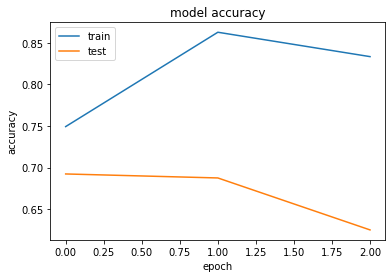

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

conclusion:
In my tuned model I changed the number of convolutional layers and the number of pools. As a result my accuracy decreased from 97% to 86%. I also changed the number of epochs I ran to 3. there was also a difference in the way the first graph turned out in contrast to the tuned model. I think the first graph looks better in terms of results.. (not 100% sure). In the tuned CNN when I changed the Conv layer to 34 instead of 64 the accuracy decreased so I think the number of convolutional layers added or subtracted plays a factor in how well the CNN performs. I do not think my model had any overfitting.